# Naive Bayes Gaussian (Cardiovascular Disease Prediction)

## Explanation

### Objective

created a machine learning model that can predict whether a person has cardiovascular disease or not, using the Naive Bayes algorithm.

### Column Descriptions

- **Age** = The age of the person in days
- **Height** = The height of the person
- **Weight** = The weight of the person
- **Gender** = The gender of the person
- **Systolic blood pressure | ap_hi** = The systolic blood pressure of the person
- **Diastolic blood pressure | ap_lo** = The diastolic blood pressure of the person
- **Cholesterol (1: normal, 2: above normal, 3: well above normal)** = The cholesterol level of the person
- **Glucose (1: normal, 2: above normal, 3: well above normal)** = The glucose level of the person
- **Smoking | smoke (binary)** = Is the person smoking or not
- **Alcohol intake | alco (binary)** = Is the person taking alcohol or not
- **Physical activity | active (binary)** = Is the person doing physical activity or not
- **Presence or absence of cardiovascular disease | cardio (binary)** = Is the person got cardiovascular disease or not

## A. Data Preparation

### A.1 Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### A.2 Load Data

In [3]:
try:
    df = pd.read_csv('cardiovascular.csv')
    print("Berhasil Membaca Data")
except Exception as e:
    print("Gagal Membaca Data")

Berhasil Membaca Data


### A.3 Viewing Data Dimensions

In [4]:
df.shape

(70000, 14)

### A.4 Viewing Data Informations

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   70000 non-null  int64  
 1   id           70000 non-null  float64
 2   age          70000 non-null  float64
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  float64
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  float64
 7   ap_lo        70000 non-null  float64
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(6), int64(8)
memory usage: 7.5 MB


### A.5 Viewing Data Statistics

In [6]:
df.describe().T.style.format("{:.2f}").background_gradient(cmap='flare')

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,70000.00,34999.50,20207.40,0.00,17499.75,34999.50,52499.25,69999.00
id,70000.00,49972.42,28851.30,0.00,25006.75,50001.50,74889.25,99999.00
age,70000.00,19468.87,2467.25,10798.00,17664.00,19703.00,21327.00,23713.00
gender,70000.00,0.35,0.48,0.00,0.00,0.00,1.00,1.00
height,70000.00,164.36,8.21,55.00,159.00,165.00,170.00,250.00
weight,70000.00,74.21,14.40,10.00,65.00,72.00,82.00,200.00
ap_hi,70000.00,128.82,154.01,-150.00,120.00,120.00,140.00,16020.00
ap_lo,70000.00,96.63,188.47,-70.00,80.00,80.00,90.00,11000.00
cholesterol,70000.00,0.37,0.68,0.00,0.00,0.00,1.00,2.00
gluc,70000.00,0.23,0.57,0.00,0.00,0.00,0.00,2.00


### A.6 Viewing Top 5 Data and Bottom 5 Data

In [7]:
df.head()

,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0.0,18393.0,1,168.0,62.0,110.0,80.0,0,0,0,0,1,0
1,1,1.0,20228.0,0,156.0,85.0,140.0,90.0,2,0,0,0,1,1
2,2,2.0,18857.0,0,165.0,64.0,130.0,70.0,2,0,0,0,0,1
3,3,3.0,17623.0,1,169.0,82.0,150.0,100.0,0,0,0,0,1,1
4,4,4.0,17474.0,0,156.0,56.0,100.0,60.0,0,0,0,0,0,0


In [8]:
df.tail()

,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,69995,99993.0,19240.0,1,168.0,76.0,120.0,80.0,0,0,1,0,1,0
69996,69996,99995.0,22601.0,0,158.0,126.0,140.0,90.0,1,1,0,0,1,1
69997,69997,99996.0,19066.0,1,183.0,105.0,180.0,90.0,2,0,0,1,0,1
69998,69998,99998.0,22431.0,0,163.0,72.0,135.0,80.0,0,1,0,0,0,1
69999,69999,99999.0,20540.0,0,170.0,72.0,120.0,80.0,1,0,0,0,1,0


### A.7 Viewing Duplicated Data

In [9]:
df.duplicated().sum()

np.int64(0)

### A.8 Viewing Missing Data

In [10]:
df.isna().sum()

Unnamed: 0     0
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

### A.9 Viewing Outliers Data

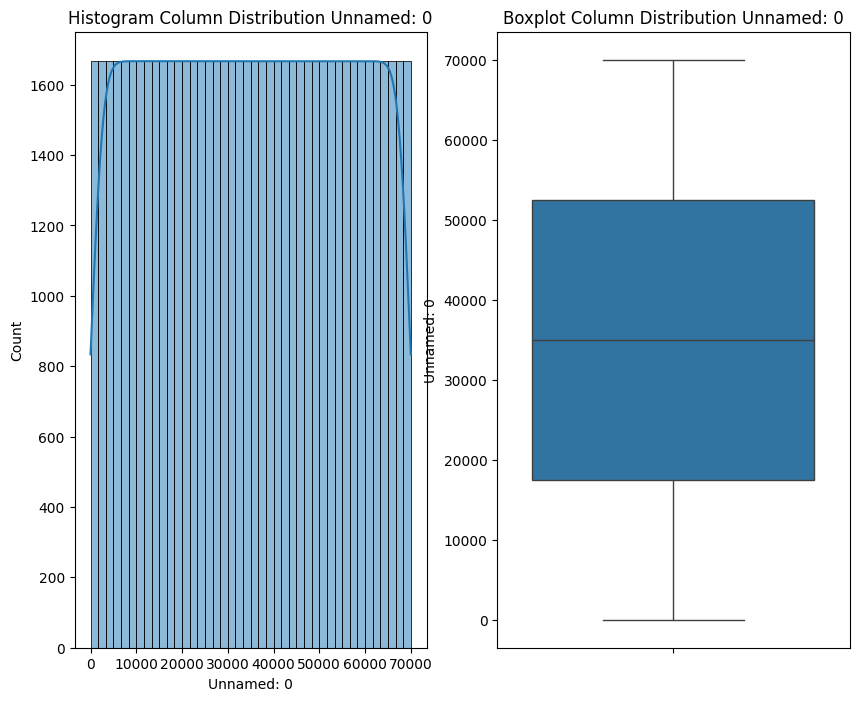

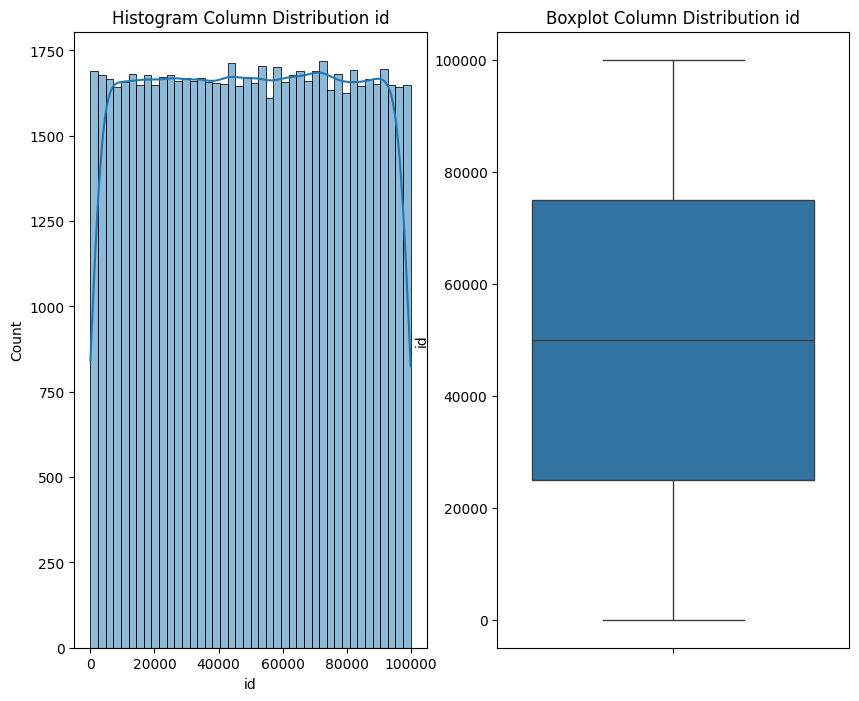

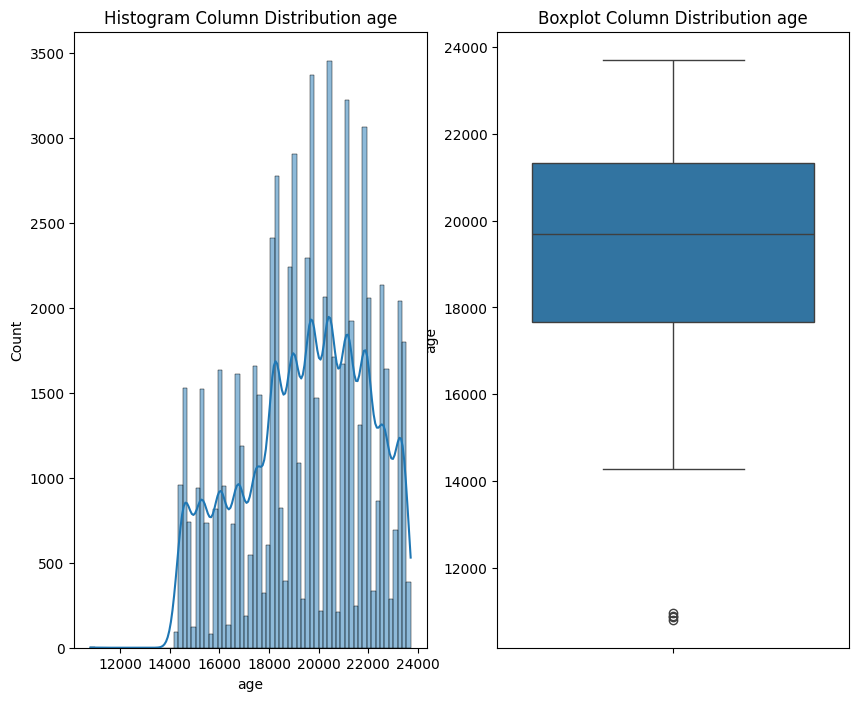

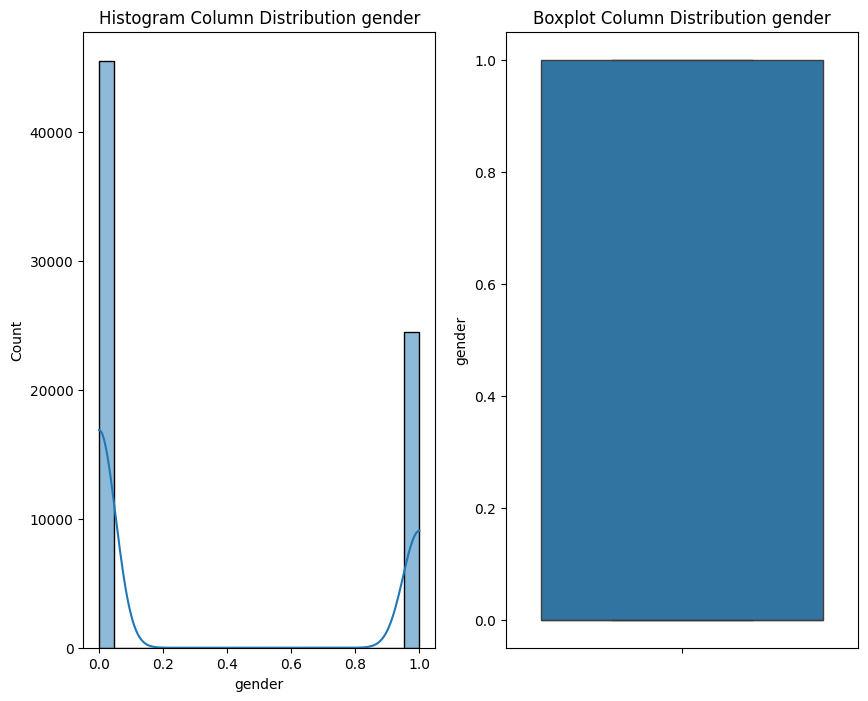

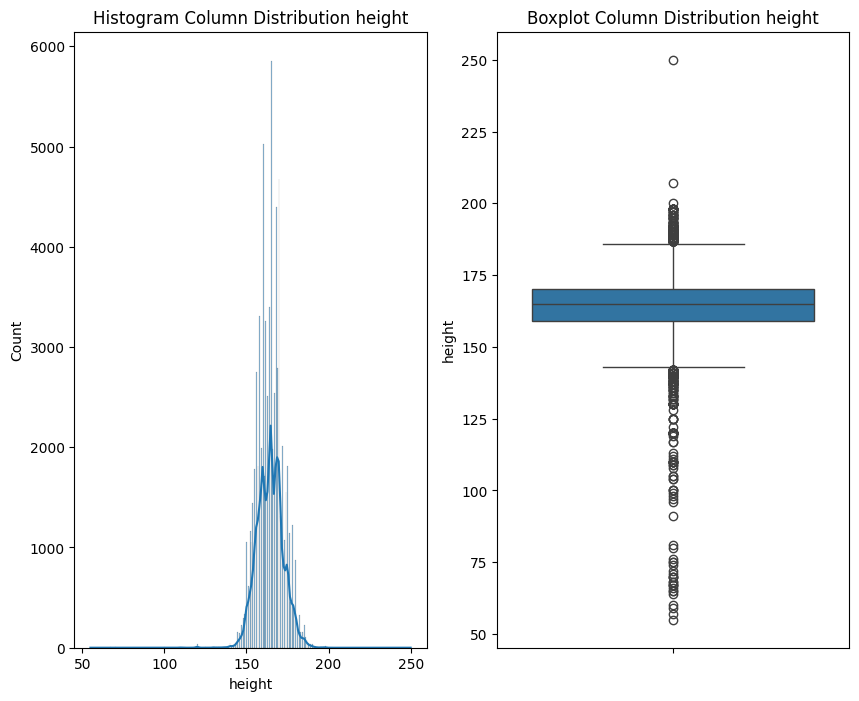

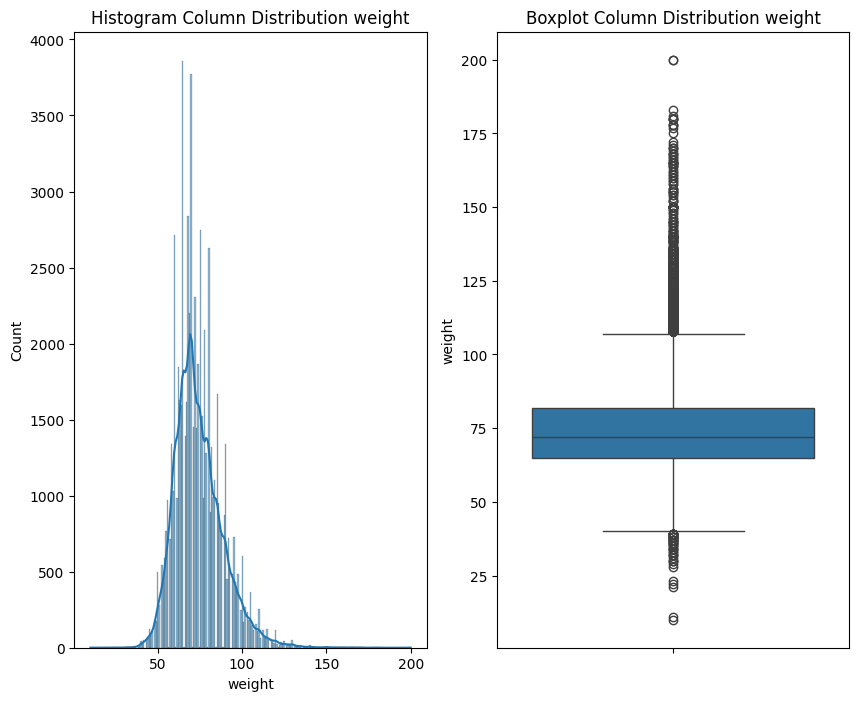

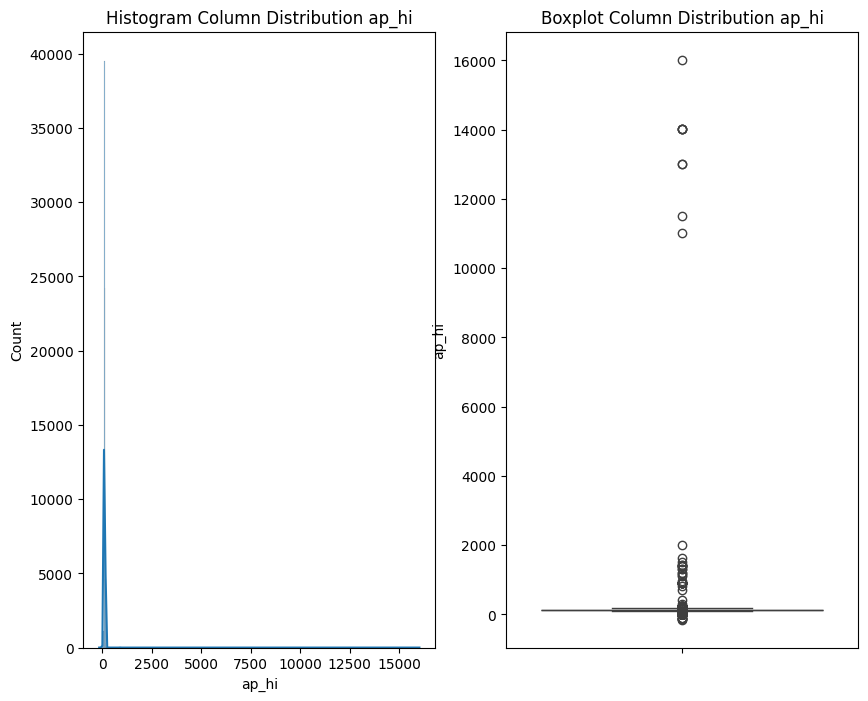

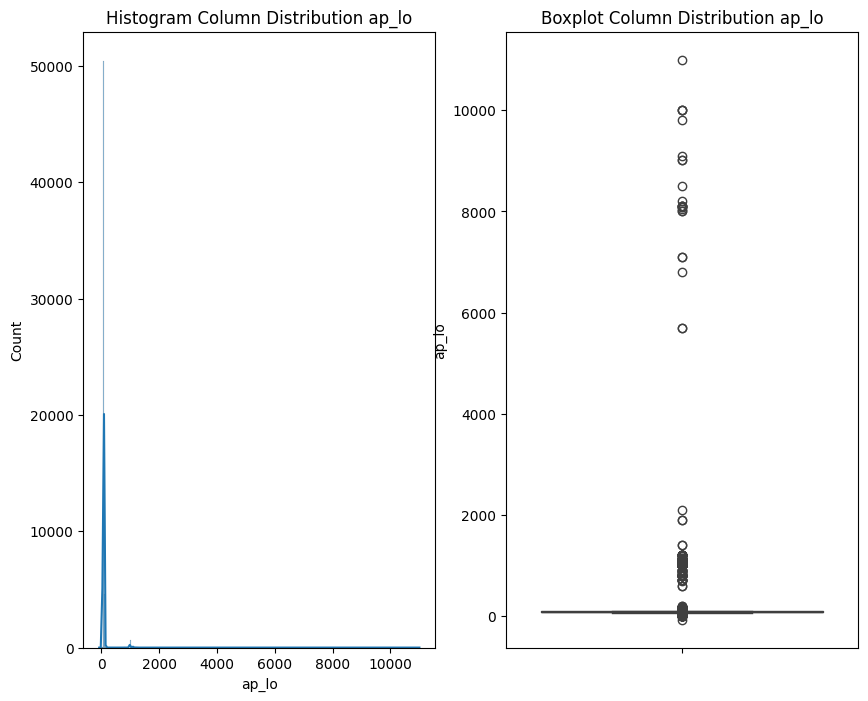

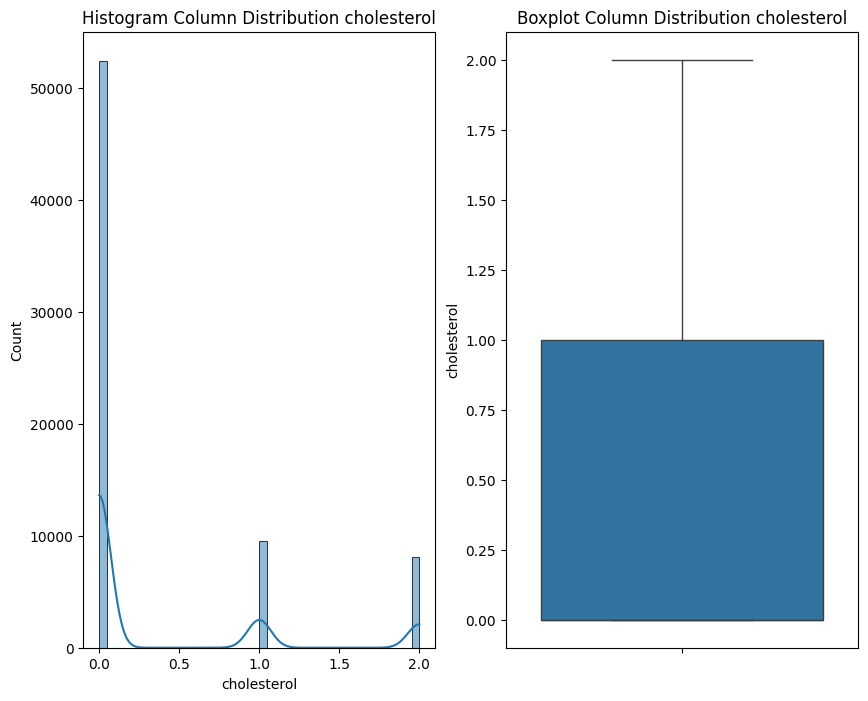

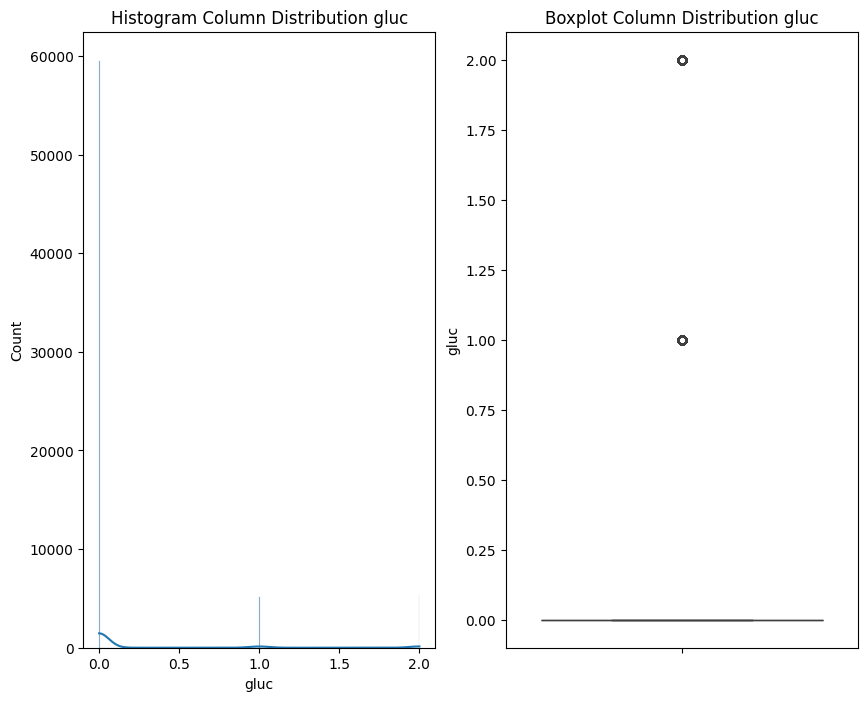

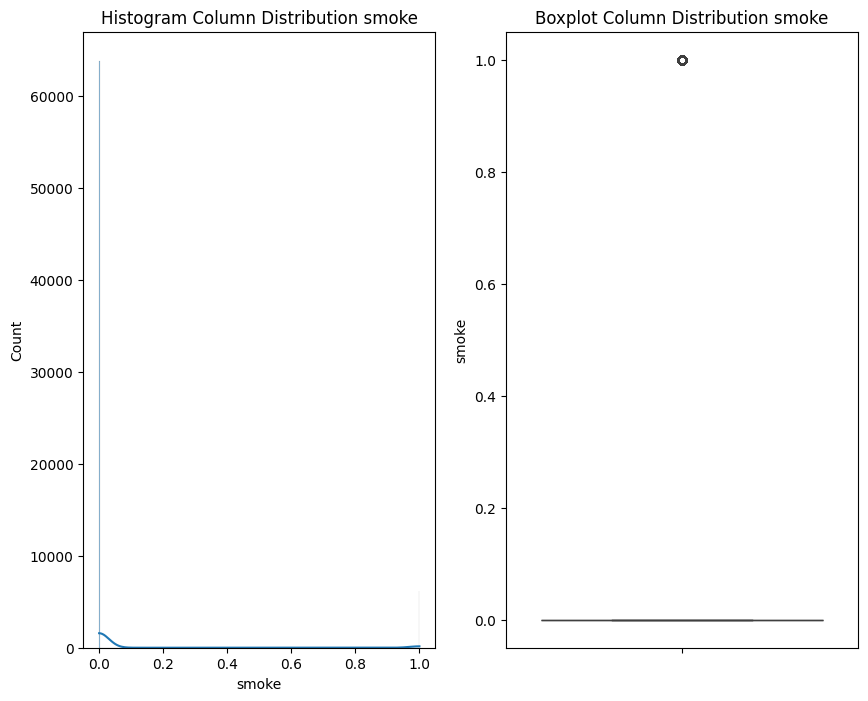

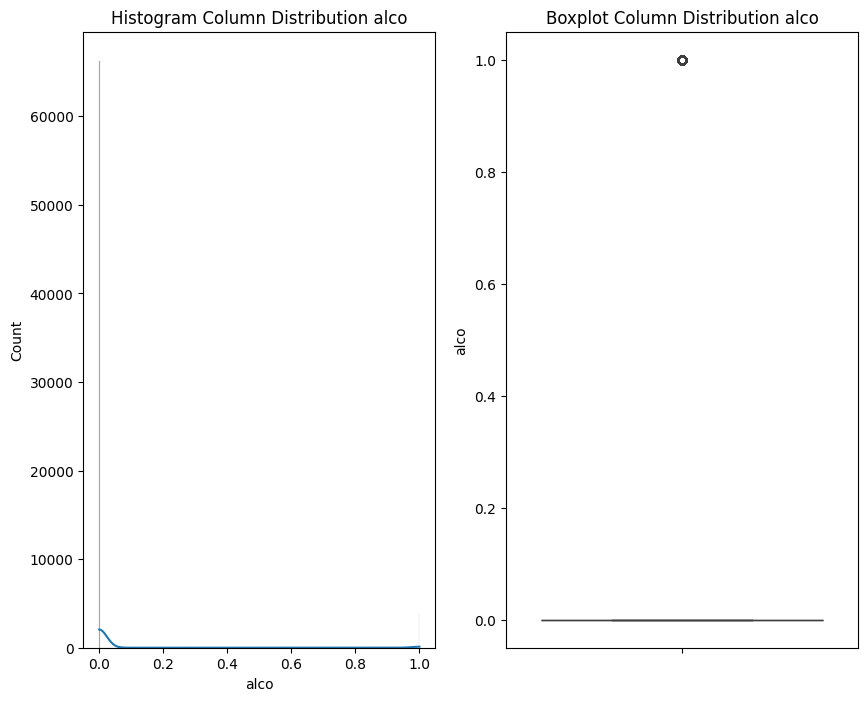

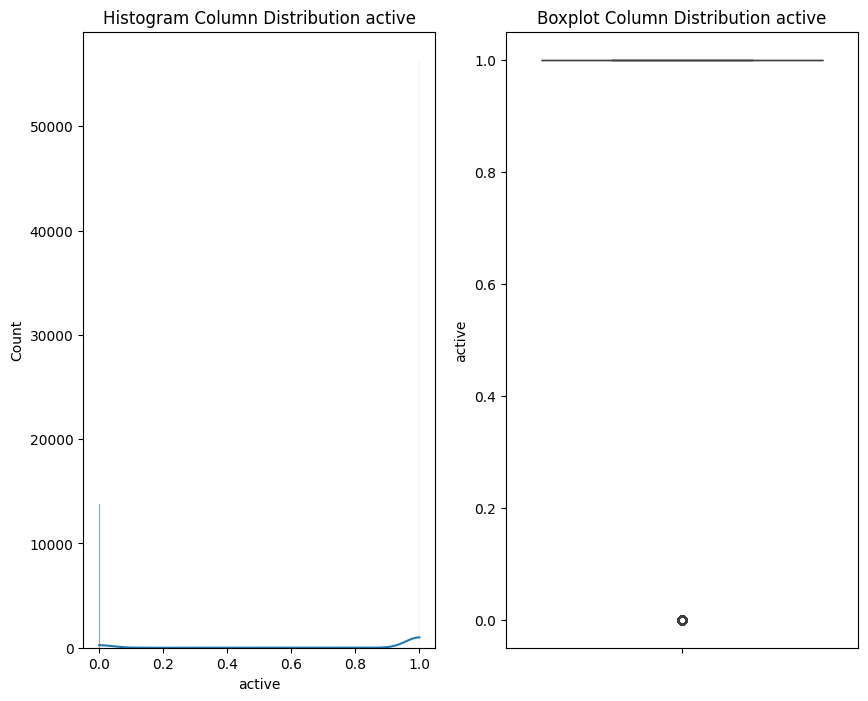

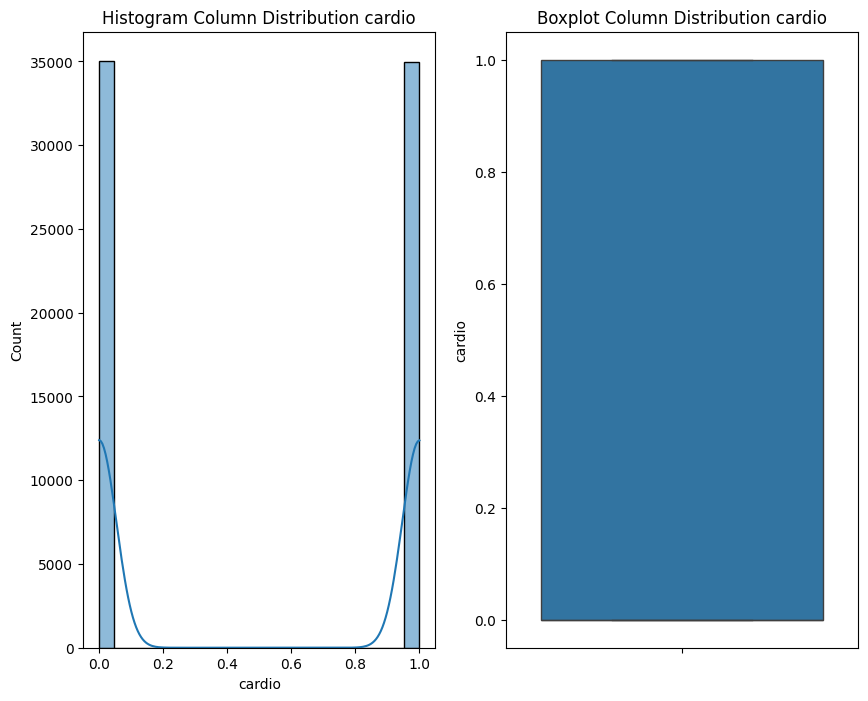

In [11]:
for col in df.select_dtypes(include='number'):
    fig, axes = plt.subplots(1, 2, figsize=(10, 8))
    sns.histplot(df[col], kde=True, ax = axes[0])
    axes[0].set_title(f"Histogram Column Distribution {col}")
    sns.boxplot(df[col], ax = axes[1])
    axes[1].set_title(f"Boxplot Column Distribution {col}")

## B. Data Preprocessing

### B.1 Feature Engineering

#### Creating New Column

Age (Years)

In [12]:
df['age_years'] = (df['age'] / 365.25).astype(int)
df.head()

,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,0.0,18393.0,1,168.0,62.0,110.0,80.0,0,0,0,0,1,0,50
1,1,1.0,20228.0,0,156.0,85.0,140.0,90.0,2,0,0,0,1,1,55
2,2,2.0,18857.0,0,165.0,64.0,130.0,70.0,2,0,0,0,0,1,51
3,3,3.0,17623.0,1,169.0,82.0,150.0,100.0,0,0,0,0,1,1,48
4,4,4.0,17474.0,0,156.0,56.0,100.0,60.0,0,0,0,0,0,0,47


Body Mass Index (BMI)

In [13]:
df['bmi'] = df['weight'] / (df['height'] / 100) ** 2
df.head()

,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
0,0,0.0,18393.0,1,168.0,62.0,110.0,80.0,0,0,0,0,1,0,50,21.967120
1,1,1.0,20228.0,0,156.0,85.0,140.0,90.0,2,0,0,0,1,1,55,34.927679
2,2,2.0,18857.0,0,165.0,64.0,130.0,70.0,2,0,0,0,0,1,51,23.507805
3,3,3.0,17623.0,1,169.0,82.0,150.0,100.0,0,0,0,0,1,1,48,28.710479
4,4,4.0,17474.0,0,156.0,56.0,100.0,60.0,0,0,0,0,0,0,47,23.011177


#### Creating A Column Category

Age Category

In [14]:
def age_category(age):
    if age < 40:
        return "Young Adult"
    elif age < 60:
        return "Middle Aged"
    else:
        return "Elderly"

df['age_category'] = df['age_years'].apply(age_category)
df.head()

,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,age_category
0,0,0.0,18393.0,1,168.0,62.0,110.0,80.0,0,0,0,0,1,0,50,21.967120,Middle Aged
1,1,1.0,20228.0,0,156.0,85.0,140.0,90.0,2,0,0,0,1,1,55,34.927679,Middle Aged
2,2,2.0,18857.0,0,165.0,64.0,130.0,70.0,2,0,0,0,0,1,51,23.507805,Middle Aged
3,3,3.0,17623.0,1,169.0,82.0,150.0,100.0,0,0,0,0,1,1,48,28.710479,Middle Aged
4,4,4.0,17474.0,0,156.0,56.0,100.0,60.0,0,0,0,0,0,0,47,23.011177,Middle Aged


Body Mass Index Category

In [15]:
def bmi_category(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif bmi < 25:
        return "Normal Weight"
    elif bmi < 30:
        return "Overweight"
    else:
        return "Obese"

df['bmi_category'] = df['bmi'].apply(bmi_category)
df.head()

,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,age_category,bmi_category
0,0,0.0,18393.0,1,168.0,62.0,110.0,80.0,0,0,0,0,1,0,50,21.967120,Middle Aged,Normal Weight
1,1,1.0,20228.0,0,156.0,85.0,140.0,90.0,2,0,0,0,1,1,55,34.927679,Middle Aged,Obese
2,2,2.0,18857.0,0,165.0,64.0,130.0,70.0,2,0,0,0,0,1,51,23.507805,Middle Aged,Normal Weight
3,3,3.0,17623.0,1,169.0,82.0,150.0,100.0,0,0,0,0,1,1,48,28.710479,Middle Aged,Overweight
4,4,4.0,17474.0,0,156.0,56.0,100.0,60.0,0,0,0,0,0,0,47,23.011177,Middle Aged,Normal Weight


### B.2 Drop Unrelated Columns

In [16]:
df.drop(columns=['Unnamed: 0', 'id', 'age'], inplace=True)

### B.3 Cleaning Data

In [17]:
df.shape

(70000, 15)

In [18]:
df = df[(df['ap_hi'] < 250) & (df['ap_hi'] > 60)]
df = df[(df['ap_lo'] < 150) & (df['ap_lo'] > 40)]

df = df[df['ap_hi'] >= df['ap_lo']]

df.shape

(68651, 15)

### B.4 Mapping Label

In [19]:
cardiovascular_mapping = {0 : "Negative", 1 : "Positive"}
df['cardio_sign'] = df['cardio'].map(cardiovascular_mapping)
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,age_category,bmi_category,cardio_sign
0,1,168.0,62.0,110.0,80.0,0,0,0,0,1,0,50,21.967120,Middle Aged,Normal Weight,Negative
1,0,156.0,85.0,140.0,90.0,2,0,0,0,1,1,55,34.927679,Middle Aged,Obese,Positive
2,0,165.0,64.0,130.0,70.0,2,0,0,0,0,1,51,23.507805,Middle Aged,Normal Weight,Positive
3,1,169.0,82.0,150.0,100.0,0,0,0,0,1,1,48,28.710479,Middle Aged,Overweight,Positive
4,0,156.0,56.0,100.0,60.0,0,0,0,0,0,0,47,23.011177,Middle Aged,Normal Weight,Negative


## C. Exploratory Data Analysis

### C.1 Univariate Analysis

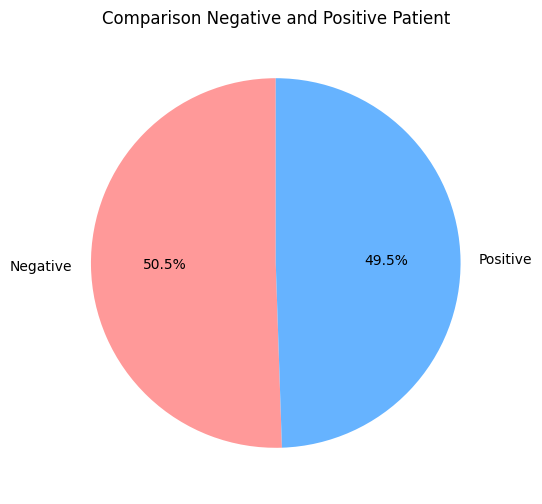

In [20]:
plt.figure(figsize=(6, 6))
df['cardio_sign'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90)
plt.title('Comparison Negative and Positive Patient')
plt.ylabel(None)
plt.show()

### C.2 Bivariate Analysis

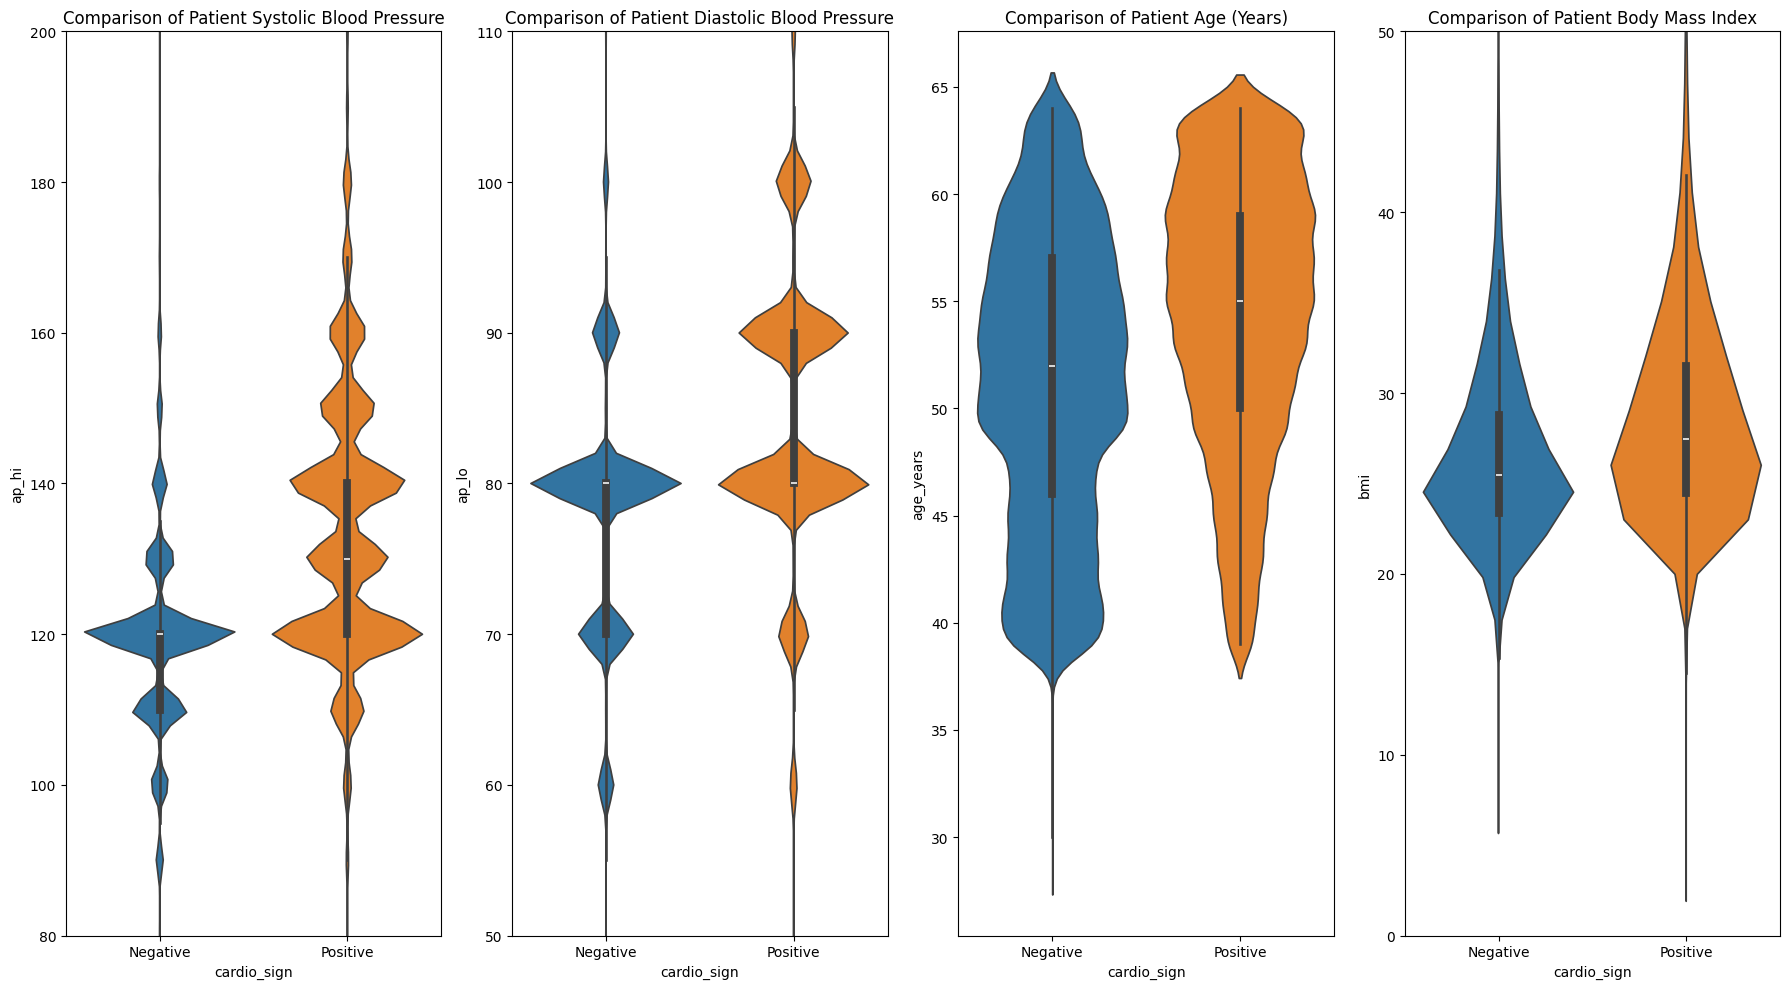

In [30]:
fig, axes = plt.subplots(1, 4, figsize=(18, 10))

sns.violinplot(x='cardio_sign', y='ap_hi', data=df, hue='cardio_sign', ax=axes[0])
axes[0].set_ylim(80, 200)
axes[0].set_title("Comparison of Patient Systolic Blood Pressure")

sns.violinplot(x='cardio_sign', y='ap_lo', data=df, hue='cardio_sign', ax=axes[1])
axes[1].set_ylim(50, 110)
axes[1].set_title("Comparison of Patient Diastolic Blood Pressure")

sns.violinplot(x='cardio_sign', y='age_years', data=df, hue='cardio_sign', ax=axes[2])
axes[2].set_title("Comparison of Patient Age (Years)")

sns.violinplot(x='cardio_sign', y='bmi', data=df, hue='cardio_sign', ax=axes[3])
axes[3].set_ylim(0, 50)
axes[3].set_title("Comparison of Patient Body Mass Index")

plt.tight_layout()
plt.show()

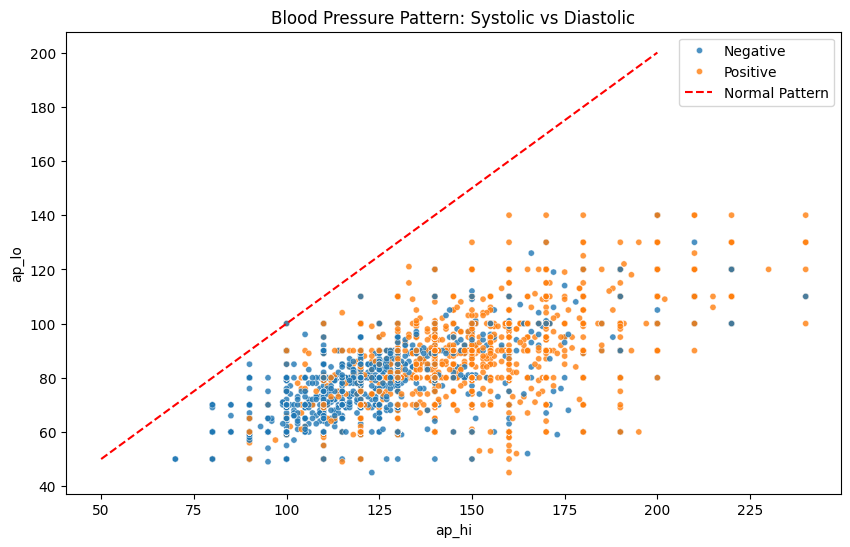

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ap_hi', y='ap_lo', hue='cardio_sign', data=df, alpha=0.8, s=20)
plt.title("Blood Pressure Pattern: Systolic vs Diastolic")
plt.plot([50, 200], [50, 200], 'r--', label='Normal Pattern')
plt.legend()
plt.show()

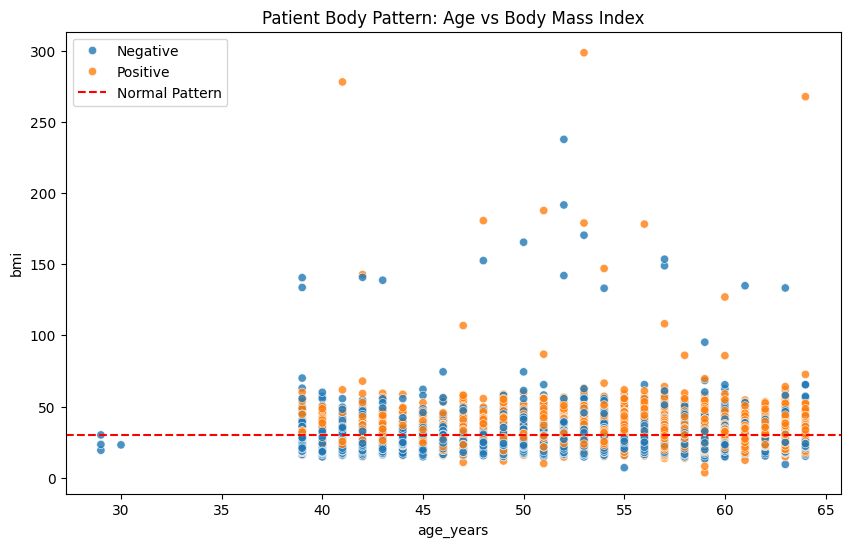

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age_years', y='bmi', hue='cardio_sign', data=df, alpha=0.8)
plt.title("Patient Body Pattern: Age vs Body Mass Index")
plt.axhline(30, color='red', linestyle='--', label='Normal Pattern')
plt.legend()
plt.show()

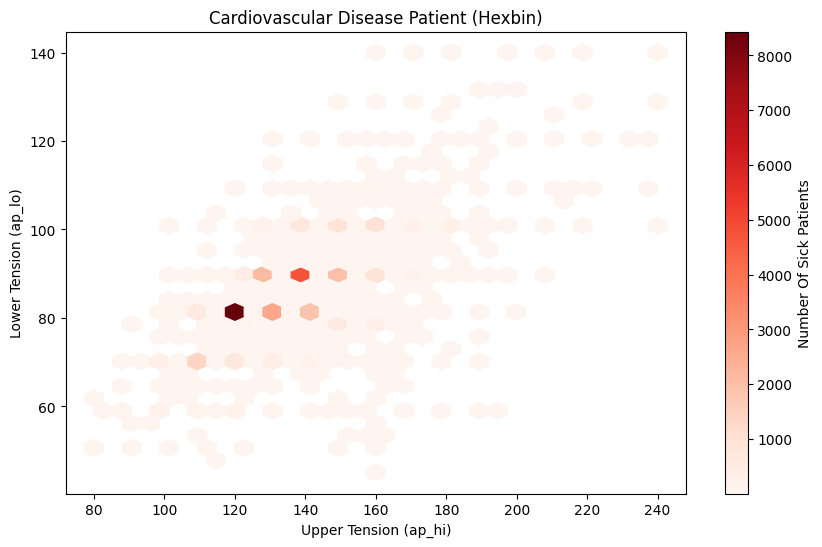

In [43]:
plt.figure(figsize=(10, 6))

plt.hexbin(x=df[df['cardio']==1]['ap_hi'], 
           y=df[df['cardio']==1]['ap_lo'], 
           gridsize=30, cmap='Reds', mincnt=1)

plt.colorbar(label='Number Of Sick Patients')
plt.title("Cardiovascular Disease Patient (Hexbin)")
plt.xlabel("Upper Tension (ap_hi)")
plt.ylabel("Lower Tension (ap_lo)")
plt.show()

### C.3 Multivariate Analysis

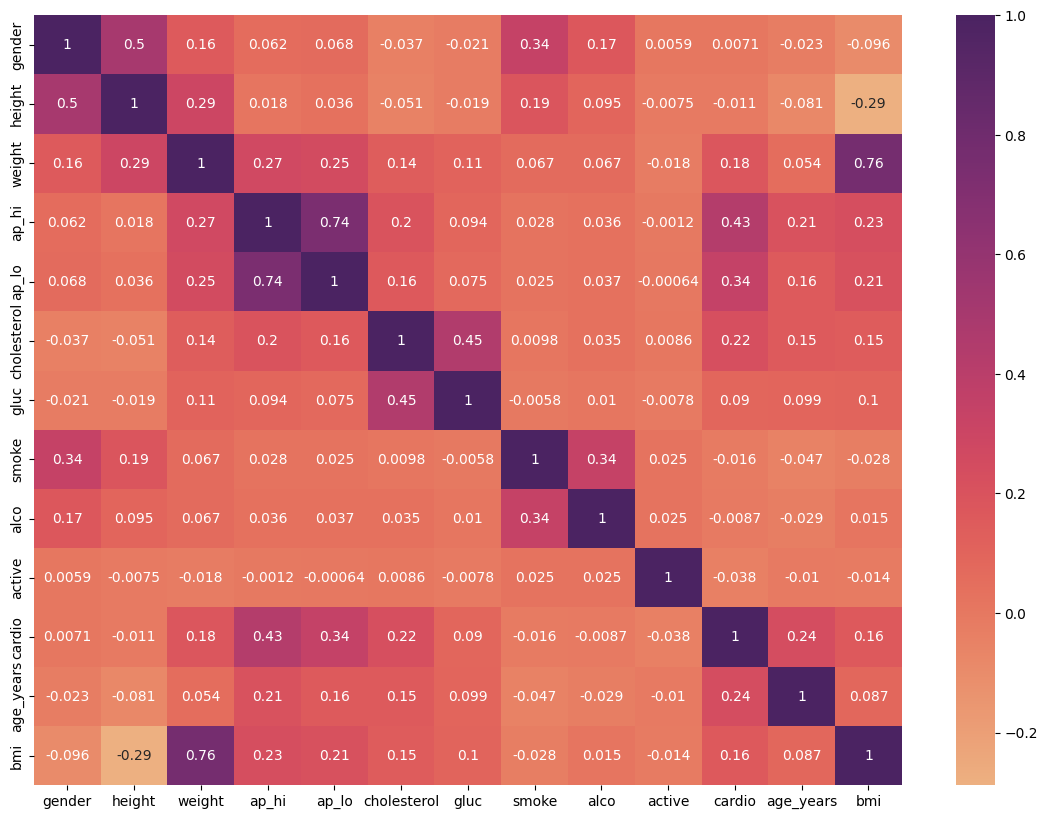

In [23]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='flare')
plt.show()

## D. Modelling

### D.1 Defining X (Features) and y (Target) Variables

In [54]:
X_data = df.select_dtypes(include=['number']).drop(columns=['cardio'])
y_data = df['cardio']

### D.2 Splitting Train Data and Test Data (80:20)

In [55]:
def stratified_split(x_data, y_data, train_size = 0.8, random_state = 42):
    np.random.seed(random_state)
    
    x_train_list, x_test_list = [], []
    y_train_list, y_test_list = [], []
    
    for class_value in np.unique(y_data):
        class_idx = np.where(y_data == class_value)[0]
        
        idx = np.random.permutation(class_idx)
        split_ratio = int(len(idx) * train_size)
        
        x_train_list.append(x_data.iloc[idx[:split_ratio]])
        x_test_list.append(x_data.iloc[idx[split_ratio:]])
        y_train_list.append(y_data.iloc[idx[:split_ratio]])
        y_test_list.append(y_data.iloc[idx[split_ratio:]])
        
    x_train = pd.concat(x_train_list).reset_index(drop = True)
    x_test = pd.concat(x_test_list).reset_index(drop = True)
    y_train = pd.concat(y_train_list).reset_index(drop = True)
    y_test = pd.concat(y_test_list).reset_index(drop = True)
    
    return x_train, x_test, y_train, y_test
X_train, X_test, y_train, y_test = stratified_split(X_data, y_data)

### D.3 Naive Bayes Gaussian

In [69]:
class NaiveBayesGaussian:
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # Store Priors, Mean, Var
        self._priors = np.zeros(n_classes, dtype=np.float64)
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            
            # Calculate Priors
            self._priors[idx] = X_c.shape[0] / float(n_samples)
            
            # Calculate Statistics
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0) + 1e-9

    def predict(self, X):
        X = np.array(X)
        return np.array([self._predict(x) for x in X])

    def _predict(self, x):
        posteriors = []

        for idx, c in enumerate(self._classes):
            # Prior
            prior = np.log(self._priors[idx])
            #Likelihood
            pdf = self._pdf(idx, x)
            likelihood = np.sum(np.log(pdf + 1e-9))
            # Posterior
            posterior = prior + likelihood
            posteriors.append(posterior)
        return self._classes[np.argmax(posteriors)]

    # Gaussian Function
    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

### D.4 Naive Bayes Gaussian Prediction

In [70]:
nbg = NaiveBayesGaussian()
nbg.fit(X_train, y_train)
test_predictions = nbg.predict(X_test)
train_predictions = nbg.predict(X_train)

## E. Evaluation

### E.1 Model Accuracy

#### Test Accuracy

In [71]:
test_accuracy = np.mean(test_predictions == y_test)
print(f"{test_accuracy:.2f}")

0.71


#### Train Accuracy

In [72]:
train_accuracy = np.mean(train_predictions == y_train)
print(f"{train_accuracy:.2f}")

0.71


### E.2 Confusion Matrix

In [73]:
pred_array = np.array(test_predictions)
test_array = np.array(y_test)

TP = np.sum((pred_array == 1) & (test_array == 1))
FP = np.sum((pred_array == 1) & (test_array == 0))
FN = np.sum((pred_array == 0) & (test_array == 1))
TN = np.sum((pred_array == 0) & (test_array == 0))

print(f"True Positives: {TP}")
print(f"False Positives: {FP}")
print(f"False Negatives: {FN}")
print(f"True Negatives: {TN}")

True Positives: 4110
False Positives: 1303
False Negatives: 2682
True Negatives: 5636


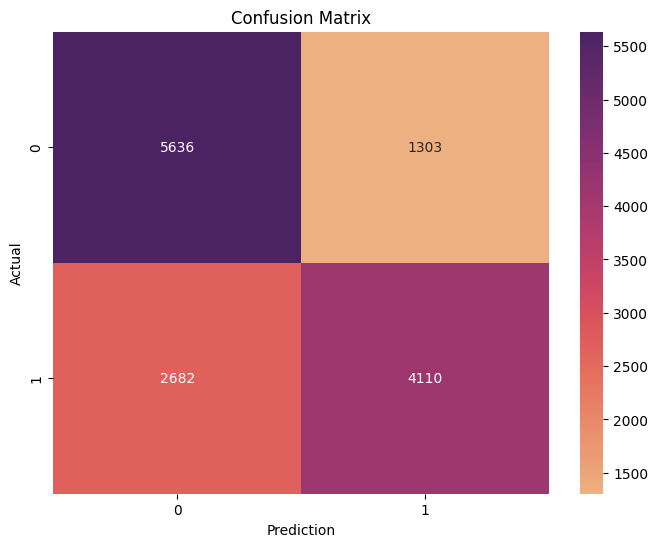

Class: Negative
True Positives: 5636
False Positives: 2682
False Negatives: 1303
True Negatives: 4110

Class: Positive
True Positives: 4110
False Positives: 1303
False Negatives: 2682
True Negatives: 5636



In [74]:
confusion_matrix = pd.crosstab(y_test, test_predictions, rownames=['Actual'], colnames=['Prediction'])
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix, annot=True, cmap='flare', fmt='d')
plt.title("Confusion Matrix")
plt.show()

cm_array = confusion_matrix.values
TP = np.diag(cm_array)
FP = np.sum(cm_array, axis=0) - TP
FN = np.sum(cm_array, axis=1) - TP
TN = np.sum(cm_array) - (TP + FP + FN)

class_names = confusion_matrix.columns
for i, name in enumerate(class_names):
    if name == 0:
        classes = "Negative"
    else:
        classes = "Positive"
        
    print(f"Class: {classes}")
    print(f"True Positives: {TP[i]}")
    print(f"False Positives: {FP[i]}")
    print(f"False Negatives: {FN[i]}")
    print(f"True Negatives: {TN[i]}\n")

### E.3 Precision

In [75]:
precision = TP / (TP + FP)
precision = np.mean(precision)
print(f"{precision}")

0.7184249649319647


### E.4 Recall

In [76]:
recall = TP / (TP + FN)
recall = np.mean(recall)
print(f"{recall}")

0.7086722280020186


### E.5 F-1 Score

In [77]:
f1 = 2 * (precision * recall) / (precision + recall)
print(f"{f1}")

0.7135152715196454
